<a href="https://colab.research.google.com/github/Unnati1805-02/Build-with-AI/blob/main/Week2(dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

<ipython-input-5-e57e0f27261f>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


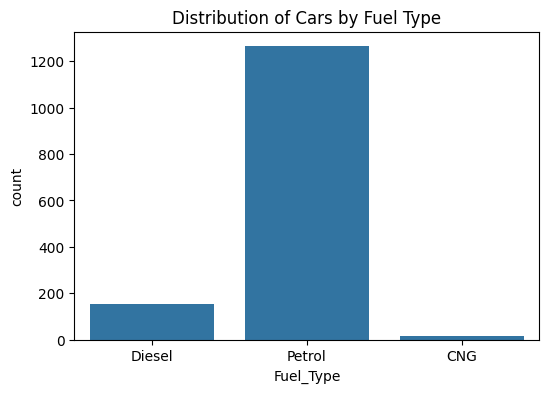

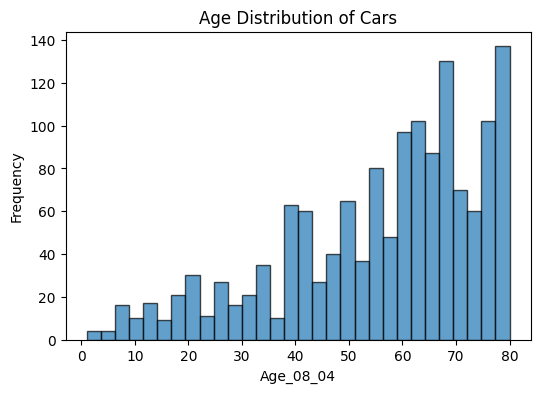

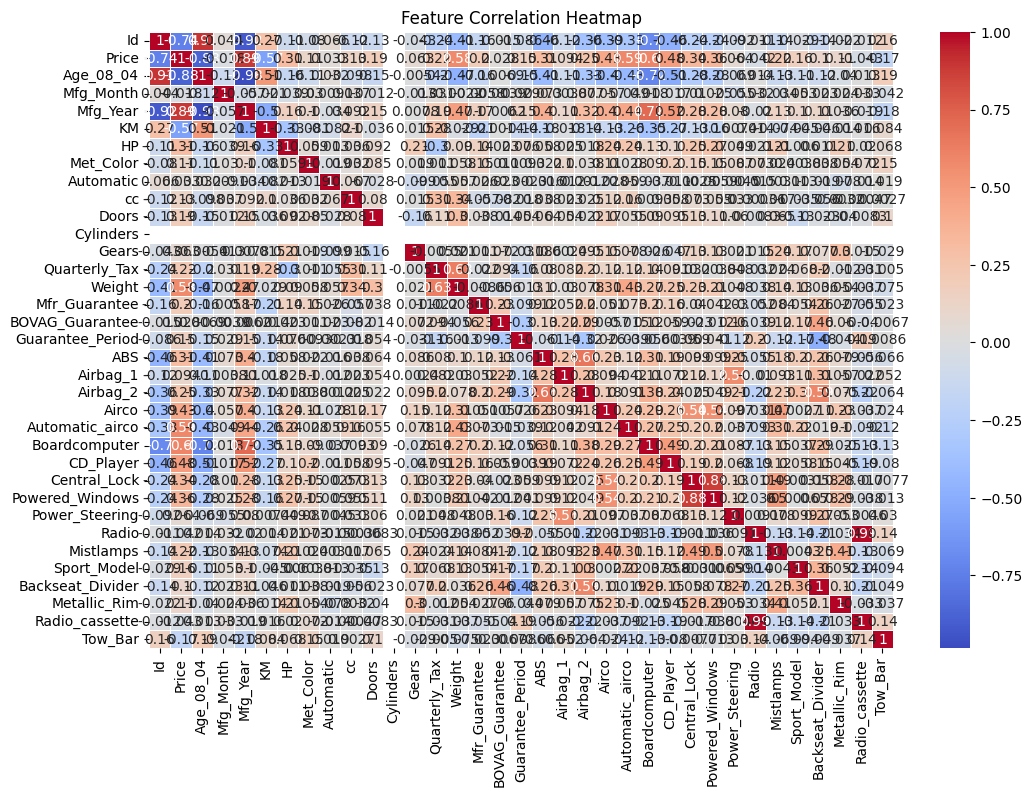

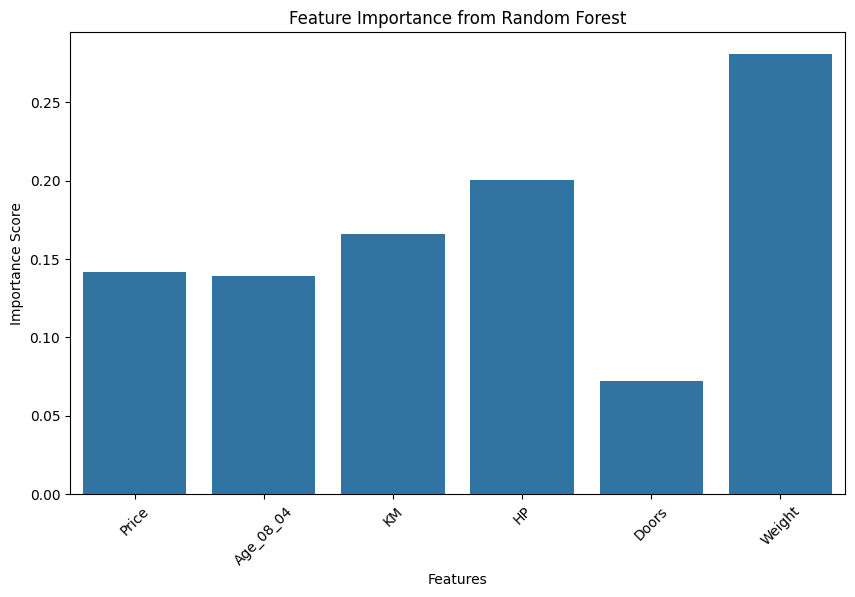

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load dataset from Google Drive link
file_url = "https://drive.google.com/uc?id=1yLbilHV68w0c5ByHzrw0ohcTATDZkeY4"
data = pd.read_csv(file_url)

# Display basic information
print(data.head())
print(data.tail())
print(data.info())
print("Shape:", data.shape)

# Checking for missing values
print("Missing Values:\n", data.isnull().sum())

# Fill missing values in numerical columns with median
for col in data.select_dtypes(include=['number']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Drop any remaining missing values if necessary
data.dropna(inplace=True)

# Recheck for missing values
print("Missing Values After Cleaning:\n", data.isnull().sum())

# Visualization: Fuel Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Fuel_Type', data=data)
plt.title("Distribution of Cars by Fuel Type")
plt.show()

# Histogram of Age_08_04
plt.figure(figsize=(6, 4))
data['Age_08_04'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title("Age Distribution of Cars")
plt.xlabel("Age_08_04")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Prepare features for model training
features = ['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Weight']
X = data[features]
y = data['Automatic']  # Predicting whether the car is automatic or not

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.show()
